In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
from config.resources import path_to

In [3]:
import pandas as pd

In [4]:
path_to_groups = path_to['with_census_endpoint'].format(endpoint='groups', query='', census='msa')
groups_df = pd.read_csv(path_to_groups, encoding='latin1')

In [5]:
groups_df['formatted_time'] = pd.to_datetime(groups_df['created'], unit='ms')

In [6]:
groups_df.head()

,category.name,city,country,created,id,last_event.yes_rsvp_count,lat,link,lon,members,name,next_event.yes_rsvp_count,past_event_count,plain_text_description,status,topics.urlkey,who,MSA_NAME,MSA_CODE,formatted_time
0,Writing,Anacortes,US,1481178052000,21517268,1.0,48.5,https://www.meetup.com/Skagit-ePublishing-Meet...,-122.61,39,Penguin Writers Table of Fidalgo,1.0,23.0,"Fiction, Fun, and Success! (And Oxford commas,...",active,"(screenwriters, writing, film-and-video-produc...",penguin writers,"Mount Vernon-Anacortes, WA Metro Area",34580.0,2016-12-08 06:20:52
1,Career & Business,Anacortes,US,1432655131000,18626652,6.0,48.5,https://www.meetup.com/AnacortesWIN/,-122.61,37,Anacortes WIN,NaN,21.0,I started Anacortes Women in Networking to con...,active,"(business-entrepreneur-networking, business-re...",Winners,"Mount Vernon-Anacortes, WA Metro Area",34580.0,2015-05-26 15:45:31
2,LGBT,Anacortes,US,1483511477000,21764703,2.0,48.5,https://www.meetup.com/meetup-group-YLsJAJzt/,-122.61,47,Anacortes Lesbian Friends Meetup,NaN,25.0,Meetups for beer/wine nights. Football/Super B...,active,"(lesbian-femme, gay, Lesbian, gay-and-lesbian-...",Friends,"Mount Vernon-Anacortes, WA Metro Area",34580.0,2017-01-04 06:31:17
3,Parents & Family,Anacortes,US,1476304583000,20702736,NaN,48.5,https://www.meetup.com/New-Moms-over-40-group/,-122.61,14,New Moms over 40 group,NaN,NaN,You are a brand new parent in your 40s...now w...,active,"(parents, families, moms-supporting-moms, new-...",Members,"Mount Vernon-Anacortes, WA Metro Area",34580.0,2016-10-12 20:36:23
4,Tech,Anacortes,US,1521470075000,27877265,NaN,48.5,https://www.meetup.com/Anacortes-Blogging-Meetup/,-122.61,8,Anacortes Blogging Meetup,NaN,NaN,ÃÂ¢ÃÂÃÂThis is a group for bloggers of al...,active,"(wordpress, social-media, online-marketing, bl...",Members,"Mount Vernon-Anacortes, WA Metro Area",34580.0,2018-03-19 14:34:35


In [7]:
from __future__ import print_function
import seaborn as sns, matplotlib.pyplot as plt

sns.set()
%matplotlib inline

## Restrict Data to Metro Areas

In [8]:
groups_df.dropna(subset=[ 'MSA_CODE' ], inplace=True)
metro_groups_df = groups_df[ groups_df['MSA_NAME'].str.contains('Metro') ]

groups_by_metro = metro_groups_df.groupby([ 'MSA_CODE', 'MSA_NAME' ], as_index=False)

## Explore Metro Areas with most number of groups

In [9]:
groups_by_metro_count = groups_by_metro.count()
top_metros = groups_by_metro_count.nlargest(30, 'id')
top_metros['MSA_NAME'] = top_metros["MSA_NAME"].apply(lambda x: x.split(',')[0])

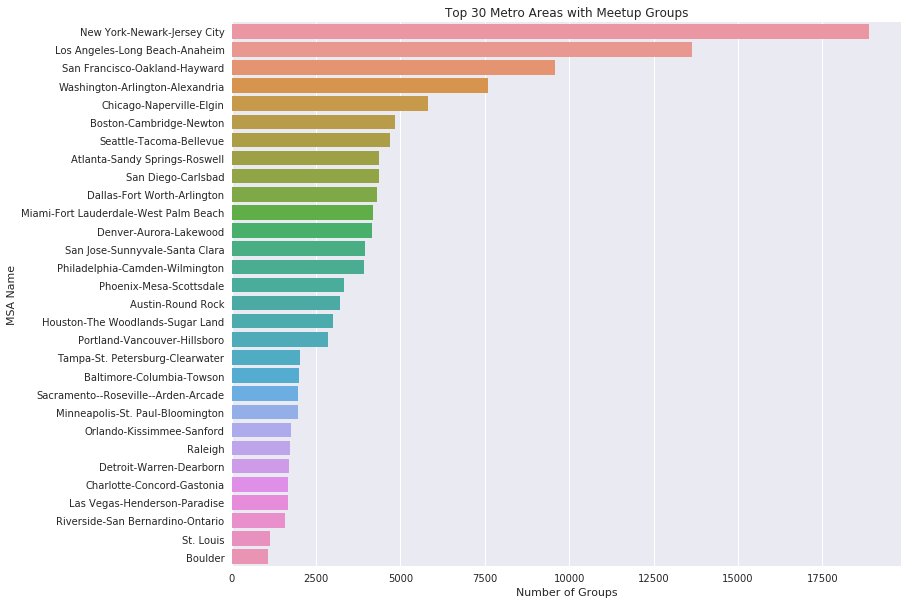

In [10]:
plt.subplots(figsize=(12,10))
ax = sns.barplot(y='MSA_NAME', x='id', data=top_metros)
ax.set_xlabel('Number of Groups')
ax.set_ylabel('MSA Name')
ax.axes.set_title('Top 30 Metro Areas with Meetup Groups')
print()

## Explore attributes of top-5 Metro Areas with most number of groups

In [11]:
group_count_lower_bound = groups_by_metro.count().nlargest(5, 'id')['id'].min()
sample_groups = groups_by_metro.filter(lambda x: x['id'].count() >= group_count_lower_bound)

### Explore top-5 groups in each of the sample metro areas ordered by number of past events

In [12]:
sample_groups_sorted_by_events = sample_groups.sort_values([ 'MSA_CODE', 'past_event_count' ], ascending=False)
sample_groups_sorted_by_events.groupby([ 'MSA_NAME' ]).apply(lambda x: x.head(5))

category.name  \
MSA_NAME                                                                          
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      67601    Sports & Recreation   
                                                   137112                 Games   
                                                   63627                  Games   
                                                   164655                 Games   
                                                   164804   Sports & Recreation   
Los Angeles-Long Beach-Anaheim, CA Metro Area      77562   Outdoors & Adventure   
                                                   34174     Health & Wellbeing   
                                                   77222    Sports & Recreation   
                                                   105213   Sports & Recreation   
                                                   169047           Socializing   
New York-Newark-Jersey City, NY-NJ-PA Metro Area   55483       Parents & Family   
                                                   175432      Parents & Family   
                                                   19549       Parents & Family   
                                                   60144         Arts & Culture   
                                                   24115                  Games   
San Francisco-Oakland-Hayward, CA Metro Area       111257               Dancing   
                                                   63209                Fitness   
                                                   89942                Fitness   
                                                   20895                Writing   
                                                   117784               Dancing   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 116558                  Tech   
                                                   47978       Sci-Fi & Fantasy   
                                                   48131                   LGBT   
                                                   1610                 Fitness   
                                                   48030                Fitness   

                                                                     city  \
MSA_NAME                                                                    
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      67601          Chicago   
                                                   137112         Chicago   
                                                   63627       Plainfield   
                                                   164655         Chicago   
                                                   164804         Chicago   
Los Angeles-Long Beach-Anaheim, CA Metro Area      77562           Irvine   
                                                   34174       Costa Mesa   
                                                   77222           Irvine   
                                                   105213   Redondo Beach   
                                                   169047   Newport Coast   
New York-Newark-Jersey City, NY-NJ-PA Metro Area   55483           Howell   
                                                   175432  Cliffside Park   
                                                   19549      Jersey City   
                                                   60144         New York   
                                                   24115         New York   
San Francisco-Oakland-Hayward, CA Metro Area       111257         Concord   
                                                   63209      San Leandro   
                                                   89942           Newark   
                                                   20895    San Francisco   
                                                   117784   San Francisco   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 116558          Reston   
                                                   47

### Explore top-5 groups ineach of the sample metro areas order by number of members

In [13]:
sample_groups_sorted_by_members = sample_groups.sort_values([ 'MSA_CODE', 'members' ], ascending=False)
sample_groups_sorted_by_members.groupby([ 'MSA_NAME']).apply(lambda x: x.head(5))

category.name  \
MSA_NAME                                                                          
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      136993           Socializing   
                                                   137110           Socializing   
                                                   112395  Outdoors & Adventure   
                                                   74044         Arts & Culture   
                                                   67606         Arts & Culture   
Los Angeles-Long Beach-Anaheim, CA Metro Area      50880                  Music   
                                                   33614            Socializing   
                                                   54802   Outdoors & Adventure   
                                                   76999            Socializing   
                                                   55074            Socializing   
New York-Newark-Jersey City, NY-NJ-PA Metro Area   104727                  Tech   
                                                   36392   Outdoors & Adventure   
                                                   6898    Outdoors & Adventure   
                                                   23752      Career & Business   
                                                   6764             Socializing   
San Francisco-Oakland-Hayward, CA Metro Area       124622           Socializing   
                                                   110402                  Tech   
                                                   79216            Socializing   
                                                   79075   Outdoors & Adventure   
                                                   118100     Career & Business   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 86253            Socializing   
                                                   86006   Education & Learning   
                                                   28371   Outdoors & Adventure   
                                                   175084  Outdoors & Adventure   
                                                   28369                   Tech   

                                                                    city  \
MSA_NAME                                                                   
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      136993        Chicago   
                                                   137110        Chicago   
                                                   112395        Chicago   
                                                   74044         Chicago   
                                                   67606         Chicago   
Los Angeles-Long Beach-Anaheim, CA Metro Area      50880     Los Angeles   
                                                   33614     Los Angeles   
                                                   54802     Los Angeles   
                                                   76999     Los Angeles   
                                                   55074     Los Angeles   
New York-Newark-Jersey City, NY-NJ-PA Metro Area   104727       Brooklyn   
                                                   36392        New York   
                                                   6898         New York   
                                                   23752        New York   
                                                   6764         New York   
San Francisco-Oakland-Hayward, CA Metro Area       124622  San Francisco   
                                                   110402  San Francisco   
                                                   79216   San Francisco   
                                                   79075   San Francisco   
                                                   118100  San Francisco   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 86253      Washington   
                                                   86006      Washington   


### Explore top-5 categories in each Metro Area

In [14]:
sample_groups_category_count = sample_groups.groupby(['MSA_CODE', 'MSA_NAME', 'category.name']).count().reset_index()
sample_groups_category_count.rename(columns={ 'id': 'count'}, inplace=True)
group_category_counts_by_msa = sample_groups_category_count[ ['MSA_NAME', 'count', 'category.name']].groupby('MSA_NAME')
group_category_counts_by_msa.apply(lambda x: x.sort_values('count', ascending=False).head(5)).drop('MSA_NAME', axis=1)

count  \
MSA_NAME                                                        
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      2      938   
                                                   31     791   
                                                   28     490   
                                                   11     422   
                                                   19     266   
Los Angeles-Long Beach-Anaheim, CA Metro Area      35    2198   
                                                   64    1341   
                                                   44    1236   
                                                   52     880   
                                                   61     844   
New York-Newark-Jersey City, NY-NJ-PA Metro Area   68    2658   
                                                   97    2548   
                                                   94    1448   
                                                   77    1303   
                                                   85     853   
San Francisco-Oakland-Hayward, CA Metro Area       130   1952   
                                                   101   1400   
                                                   110    755   
                                                   127    535   
                                                   118    484   
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 134   1143   
                                                   163    870   
                                                   160    596   
                                                   143    487   
                                                   151    305   

                                                                 category.name  
MSA_NAME                                                                        
Chicago-Naperville-Elgin, IL-IN-WI Metro Area      2         Career & Business  
                                                   31                     Tech  
                                                   28              Socializing  
                                                   11       Health & Wellbeing  
                                                   19   New Age & Spirituality  
Los Angeles-Long Beach-Anaheim, CA Metro Area      35        Career & Business  
                                                   64                     Tech  
                                                   44       Health & Wellbeing  
                                                   52   New Age & Spirituality  
                                                   61              Socializing  
New York-Newark-Jersey City, NY-NJ-PA Metro Area   68        Career & Business  
                                                   97                     Tech  
                                                   94              Socializing  
                                                   77       Health & Wellbeing  
                                                   85   New Age & Spirituality  
San Francisco-Oakland-Hayward, CA Metro Area       130                    Tech  
                                                   101       Career & Business  
                                                   110      Health & Wellbeing  
                                                   127             Socializing  
                                                   118  New Age & Spirituality  
Washington-Arlington-Alexandria, DC-VA-MD-WV Me... 134       Career & Business  
                                                   163                    Tech  
                                                   160             Socializing  
                                                   143      Health & Wellbeing  
                                                   151  New Age & Spirituality

### Exploring distribution of categories among groups in the sample Metro Areas

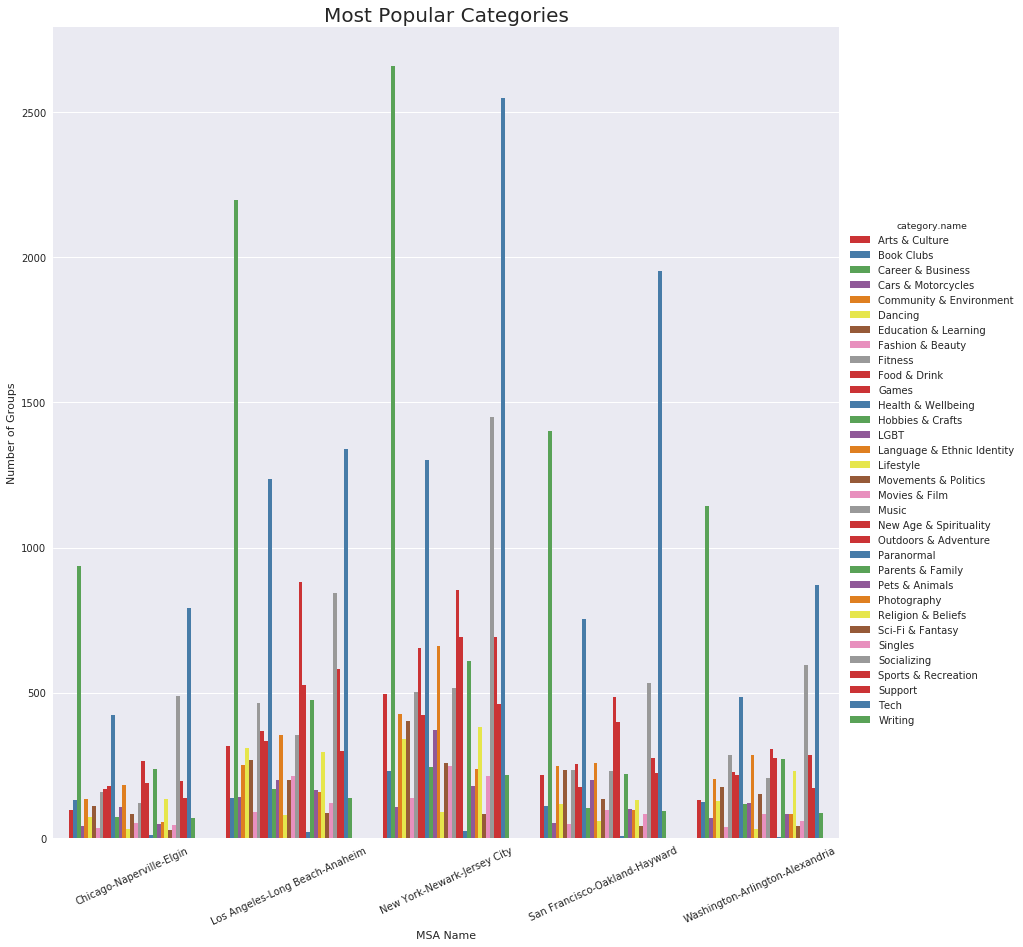

In [15]:
sample_groups_category_count['MSA_NAME'] = sample_groups_category_count['MSA_NAME'].apply(lambda x: x.split(',')[0])

g = sns.factorplot(x='MSA_NAME', y='count', kind='bar', hue='category.name', size=12, 
                   palette=sns.color_palette('Set1', 10), data=sample_groups_category_count)

g.set_xlabels('MSA Name')
g.set_ylabels('Number of Groups')
g.set_xticklabels(rotation=25)

plt.title('Most Popular Categories', fontsize=20)
print()